<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Lab Ditribuições**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Q1.

Considere a base de dados `glasses` de materiais de vidros reciclados.

* Quais dentre os valores 'clarity', 'density', 'purity' e 'silica' definem/separam mais claramente a qualidade dos vidros reciclados?
* Para isso faça um gráfico distribuição dos valores pelas classes de qualidade.
* Crie os gráficos para os 4 valores, em uma única figura, e empregue o comando `zip()` para iterar os valores e eixos da figura.





In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/glasses.csv')
df.head()


,color,clarity,density,purity,silica,quality,price+
0,E,51.0,35.0,14.0,2.0,Accept,326
1,E,49.0,30.0,14.0,2.0,Accept,326
2,E,47.0,32.0,13.0,2.0,Accept,327
3,I,46.0,31.0,15.0,2.0,Accept,334
4,J,50.0,36.0,14.0,2.0,Accept,335


# Q2.

Considere a base de dados `glasses` de materiais de vidros reciclados.

* Quais dentre os valores 'clarity', 'price+', 'purity' e 'silica' têm uma distribuição mais próxima da normal? Faça uma análise através da visualização dos dados.
* Crie os gráficos para os 4 valores, em uma única figura.

# Q3.

Considere a base de dados `glasses` de materiais de vidros reciclados.

A)

* Quais dentre os valores 'clarity', 'density', 'purity', 'silica' qual(is) apresenta(m) mais *outliers*?
* Crie um único gráfico (não só uma única figura) para todos valores.

B)

* No gráfico anterior, inclua o `price+`. Veja o que é necessário para melhorar o aspecto do gráfico? Existem *outliers* de preços?

# Q4.

A.

Considere a base de dados `flights` sobre atrasos de vôos. Você está interessado em determinar uma taxa de penalidade para as companias com maior atraso. Você decide penalizar atrasos superiores aos 20% maiores atrasos do seu histórico.

* Crie os gráficos distribuição e de densidade de probabilidade acumulada em uma única figura e indique com uma linha o ponto de penalidade das companias.
* Preencha colorindo a faixa de valores penalizada.
* Quais companias, no histórico de vôos, seriam então penalizadas?
* Salve sua figura em formato `.png` e poste a figura no Canvas.

B.

Qual compania não apresenta *outliers* de atraso?

C.

Considerando 10 intervalos de atraso, qual o intervalo com maior número de ocorrências e a sua quantidade.

In [ ]:
flights = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/flights_delays_2015.csv')
flights.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,12.0,United Air Lines Inc.
3,7.0,United Air Lines Inc.
4,-14.0,United Air Lines Inc.


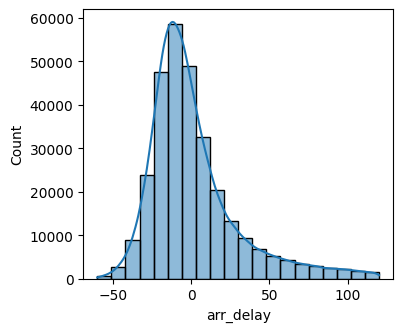

In [ ]:
plt.figure(figsize=(4,3.5))

sns.histplot(flights.arr_delay,kde=True,bins=20,alpha=0.5)

plt.show()

Quando stat='density', as alturas das barras são escaladas de modo que a área total sob o histograma (ou sobre o gráfico) seja igual a 1, representando uma estimativa da densidade de probabilidade da distribuição subjacente dos dados.


plt.subplot(2, 1, 1) é uma função usada em Matplotlib para criar uma grade de subplots em uma figura. Ela especifica que a figura terá 2 linhas de subplots e 1 coluna, e o subplot atual é o primeiro na ordem, ou seja, o subplot superior.

Os três argumentos fornecidos para plt.subplot especificam o número de linhas, o número de colunas e o índice do subplot atual. Neste caso, 2, 1, 1 significa que estamos criando uma grade com 2 linhas e 1 coluna, e estamos trabalhando no primeiro (superior) subplot.

Da mesma forma, plt.subplot(2, 1, 2) cria o segundo (inferior) subplot na mesma figura. Este subplot inferior é onde traçamos o segundo gráfico.

Assim, plt.subplot(2, 1, 1) e plt.subplot(2, 1, 2) dividem a figura em duas partes verticais, onde cada parte é um subplot que pode conter um gráfico separado.


kde=True é um parâmetro usado em funções de plotagem, como sns.histplot() ou sns.kdeplot(), em Seaborn. Ele especifica se a função deve traçar uma estimativa da densidade do kernel (KDE - Kernel Density Estimation) sobre o histograma ou outra representação gráfica dos dados.

Quando kde=True, uma curva suavizada é plotada sobre o histograma (ou outra representação gráfica), representando uma estimativa suavizada da densidade de probabilidade da distribuição subjacente dos dados. Isso pode ser útil para visualizar a forma geral da distribuição e identificar padrões, especialmente quando a distribuição não é bem representada apenas pelo histograma.

Se kde=False, apenas o histograma (ou outra representação gráfica) dos dados será mostrado, sem a curva suavizada da densidade de kernel.

bins=20 é um parâmetro usado em funções de plotagem de histograma, como sns.histplot() ou plt.hist(), para especificar o número de intervalos em que os dados serão divididos ao criar o histograma.

Quando você define bins=20, significa que os dados serão divididos em 20 intervalos (ou caixas) e o histograma mostrará a contagem de observações em cada um desses intervalos. Esse parâmetro controla a resolução do histograma e pode afetar a aparência geral do gráfico, tornando-o mais ou menos suavizado, dependendo da quantidade de dados e da distribuição subjacente. Um valor maior de bins resultará em mais detalhes no histograma, enquanto um valor menor suavizará o histograma.

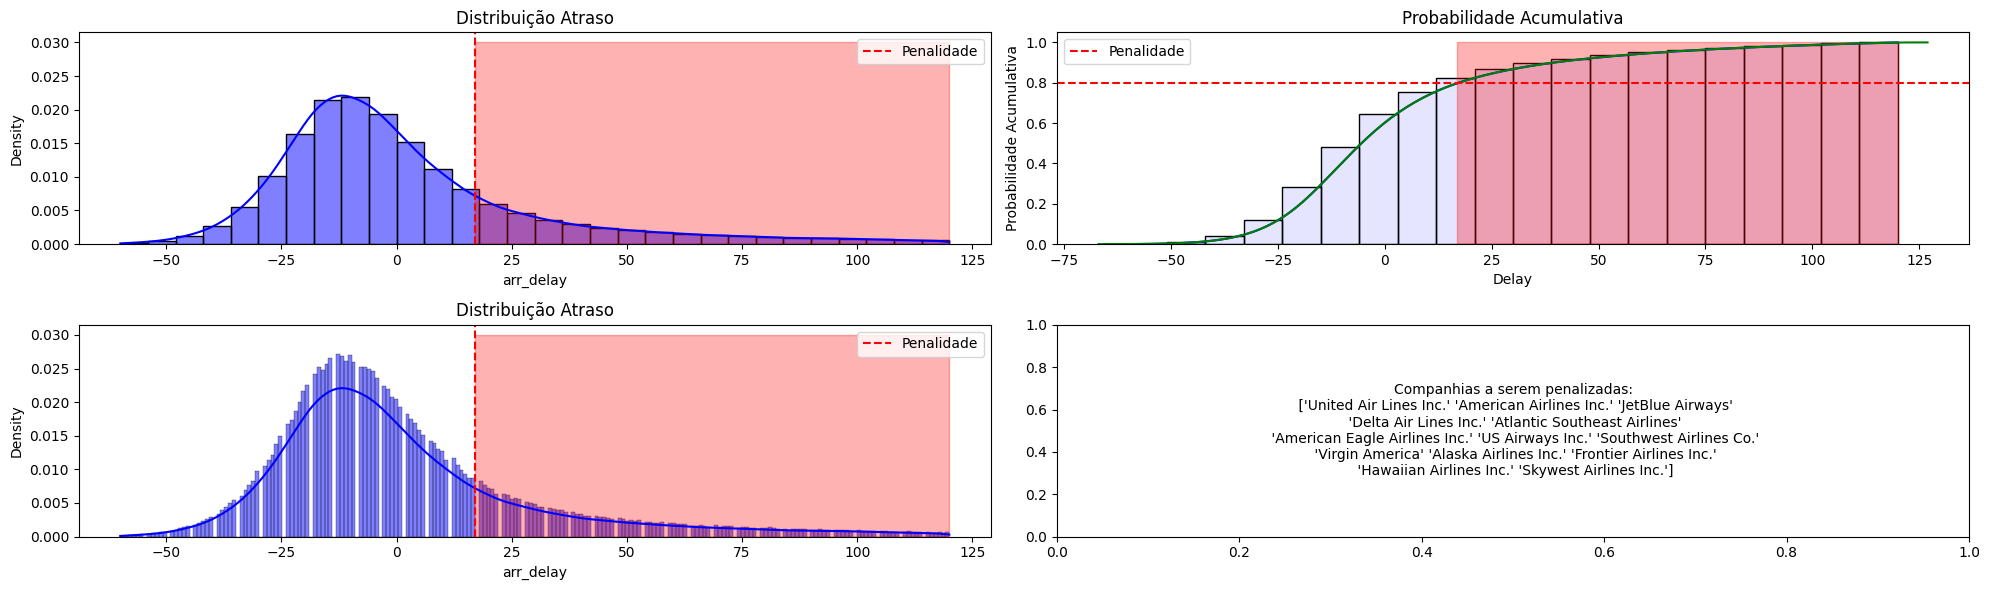

In [ ]:
# Calcular o limite para a penalidade (20% maiores atrasos)
penalty_limit = np.percentile(flights['arr_delay'], 80)
# print(penalty_limit)
# Identificar as companhias a serem penalizadas
penalized_companies = flights[flights['arr_delay'] > penalty_limit]['name'].unique()

# Plotar a distribuição e a densidade de probabilidade acumulada
plt.figure(figsize=(20, 6))

# Distribuição
plt.subplot(2, 2, 1)
sns.histplot(flights['arr_delay'], kde=True,bins=30, stat='density', color='blue')
plt.axvline(penalty_limit, color='red', linestyle='--', label='Penalidade')
plt.xlabel('arr_delay')
plt.ylabel('Density')
plt.title('Distribuição Atraso')
plt.legend()

# Preencher a faixa de valores penalizados
plt.fill_betweenx(np.linspace(0, 0.03, 100), penalty_limit, flights['arr_delay'].max(), color='red', alpha=0.3)

# Distribuição2
plt.subplot(2, 2, 3)
sns.histplot(flights['arr_delay'], kde=True, stat='density', color='blue')
plt.axvline(penalty_limit, color='red', linestyle='--', label='Penalidade')
plt.xlabel('arr_delay')
plt.ylabel('Density')
plt.title('Distribuição Atraso')
plt.legend()

# Preencher a faixa de valores penalizados
plt.fill_betweenx(np.linspace(0, 0.03, 100), penalty_limit, flights['arr_delay'].max(), color='red', alpha=0.3)

# Densidade de probabilidade acumulada
plt.subplot(2, 2, 2)
# sns.histplot(data=flights, x="arr_delay", bins=20, kde=True, cumulative=True,  color='yellow', stat='density',alpha=0.3)
sns.histplot(data=flights, x="arr_delay", bins=20, kde=True, cumulative=True,  color='blue', stat='density',alpha=0.1)
sns.kdeplot(flights['arr_delay'], cumulative=True, color='green')

plt.axhline(y=0.8, color='red', linestyle='--', label='Penalidade')
plt.xlabel('Delay')
plt.ylabel('Probabilidade Acumulativa')
plt.title('Probabilidade Acumulativa')
plt.legend()

# Preencher a faixa de valores penalizados
plt.fill_betweenx(np.linspace(0, 1, 100), penalty_limit, flights['arr_delay'].max(), color='red', alpha=0.3)

plt.subplot(2, 2, 4)


plt.text(0.5, 0.5, f'Companhias a serem penalizadas:\n {penalized_companies}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Salvar a figura em formato .png
plt.tight_layout()
plt.savefig('AtividadeDistribuicao.png')
plt.show()


CHAT


Companhias a serem penalizadas:
['United Air Lines Inc.' 'American Airlines Inc.' 'JetBlue Airways'
 'Delta Air Lines Inc.' 'Atlantic Southeast Airlines'
 'American Eagle Airlines Inc.' 'US Airways Inc.' 'Southwest Airlines Co.'
 'Virgin America' 'Alaska Airlines Inc.' 'Frontier Airlines Inc.'
 'Hawaiian Airlines Inc.' 'Skywest Airlines Inc.']


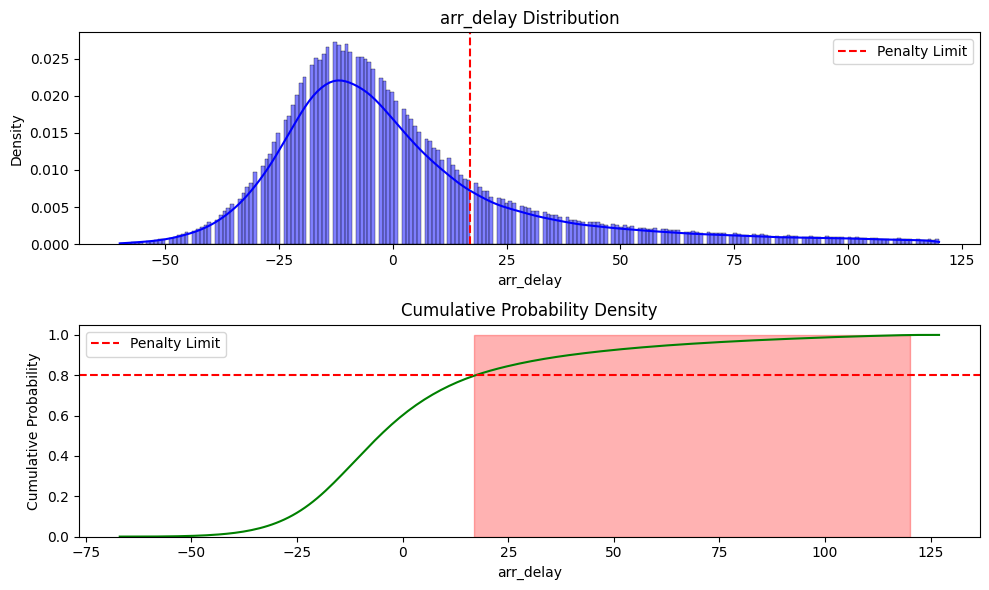

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Calcular o limite para a penalidade (20% maiores atrasos)
penalty_limit = np.percentile(flights['arr_delay'], 80)

# Identificar as companhias a serem penalizadas
penalized_companies = flights[flights['arr_delay'] > penalty_limit]['name'].unique()

# Plotar a distribuição e a densidade de probabilidade acumulada
plt.figure(figsize=(10, 6))

# Distribuição
plt.subplot(2, 1, 1)
sns.histplot(flights['arr_delay'], kde=True, stat='density', color='blue')
plt.axvline(penalty_limit, color='red', linestyle='--', label='Penalty Limit')
plt.xlabel('arr_delay')
plt.ylabel('Density')
plt.title('arr_delay Distribution')
plt.legend()

# Densidade de probabilidade acumulada
plt.subplot(2, 1, 2)
sns.kdeplot(flights['arr_delay'], cumulative=True, color='green')
plt.axhline(y=0.8, color='red', linestyle='--', label='Penalty Limit')
plt.xlabel('arr_delay')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Probability Density')
plt.legend()

# Preencher a faixa de valores penalizados
plt.fill_betweenx(np.linspace(0, 1, 100), penalty_limit, flights['arr_delay'].max(), color='red', alpha=0.3)

# Mostrar as companhias penalizadas
print("Companhias a serem penalizadas:")
print(penalized_companies)

# Salvar a figura em formato .png
plt.tight_layout()
plt.savefig('arr_delay_penalty_plot.png')
plt.show()


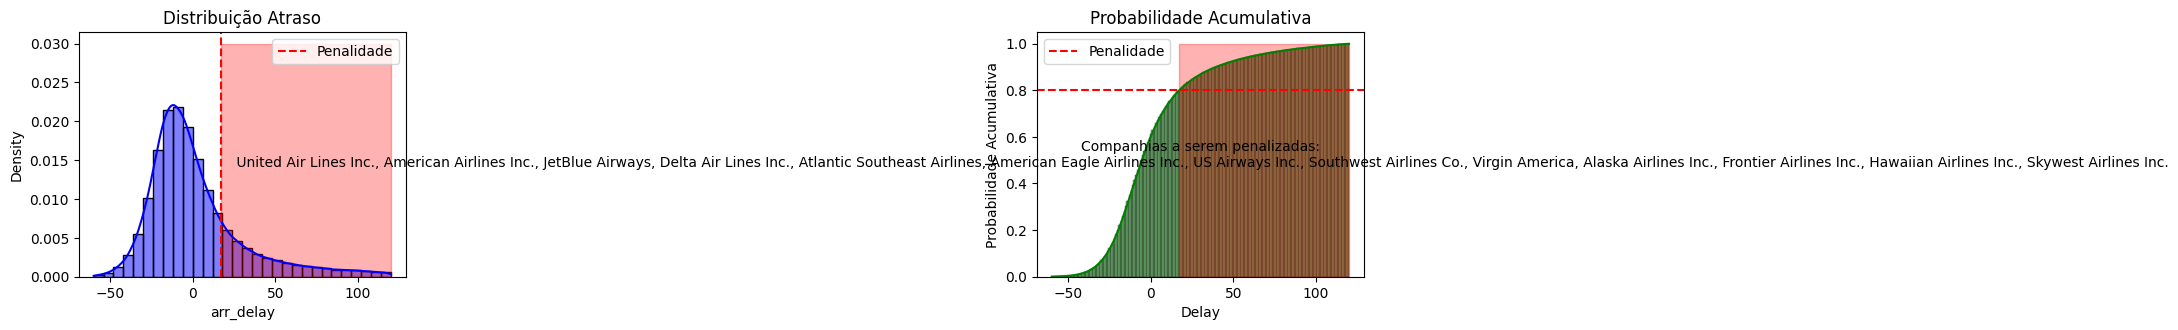

In [ ]:
# Calcular o limite para a penalidade (20% maiores atrasos)
penalty_limit = np.percentile(flights['arr_delay'], 80)

# Identificar as companhias a serem penalizadas
penalized_companies = flights[flights['arr_delay'] > penalty_limit]['name'].unique()

# Plotar a distribuição e a densidade de probabilidade acumulada
plt.figure(figsize=(20, 6))

# Distribuição
plt.subplot(2, 2, 1)
sns.histplot(flights['arr_delay'], kde=True, bins=30, stat='density', color='blue')
plt.axvline(penalty_limit, color='red', linestyle='--', label='Penalidade')
plt.xlabel('arr_delay')
plt.ylabel('Density')
plt.title('Distribuição Atraso')
plt.legend()

# Preencher a faixa de valores penalizados
plt.fill_betweenx(np.linspace(0, 0.03, 100), penalty_limit, flights['arr_delay'].max(), color='red', alpha=0.3)

# Densidade de probabilidade acumulada
plt.subplot(2, 2, 2)
sns.histplot(flights['arr_delay'], kde=True, cumulative=True, stat='density', color='green')
plt.axhline(y=0.8, color='red', linestyle='--', label='Penalidade')
plt.xlabel('Delay')
plt.ylabel('Probabilidade Acumulativa')
plt.title('Probabilidade Acumulativa')
plt.legend()

# Preencher a faixa de valores penalizados
plt.fill_betweenx(np.linspace(0, 1, 100), penalty_limit, flights['arr_delay'].max(), color='red', alpha=0.3)

# Adicionar texto com as companhias penalizadas
plt.text(0.5, 0.5, f'Companhias a serem penalizadas:\n {", ".join(penalized_companies)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Salvar a figura em formato .png
plt.tight_layout()
plt.savefig('AtividadeDistribuicao.png')
plt.show()
